# The World of TED

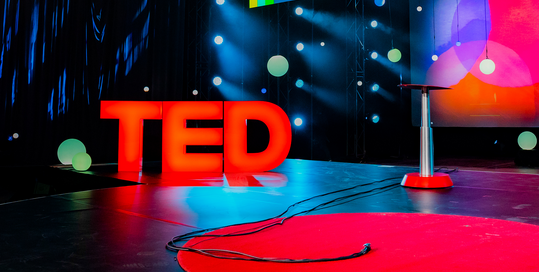

Founded in 1984 by Richard Saulman as a non profit organisation that aimed at bringing experts from the fields of Technology, Entertainment and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan and Bill Gates.

Ted, which operates under the slogan 'Ideas worth spreading' has managed to achieve an incredible feat of bringing world renowned experts from various walks of life and study and giving them a platform to distill years of their work and research into talks of 18 minutes in length. What's even more incredible is that their invaluable insights is available on the Internet for free.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
# from pandas.io.json import json_normalize
#from wordcloud import WordCloud, STOPWORDS

The data has been obtained by running a custom web scraper on the official TED.com website. The data is shared under the Creative Commons License (just like the TED Talks) and hosted on Kaggle. You can download it here: https://www.kaggle.com/rounakbanik/ted-talks

## The Main TED Dataset

The main dataset contains metadata about every TED Talk hosted on the TED.com website until September 21, 2017.

In [52]:
df = pd.read_csv('ted_main.csv')
df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.t

In [53]:
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

## Features Available

* **name:** The official name of the TED Talk. Includes the title and the speaker.
* **title:** The title of the talk
* **description:** A blurb of what the talk is about.
* **main_speaker:** The first named speaker of the talk.
* **speaker_occupation:** The occupation of the main speaker.
* **num_speaker:** The number of speakers in the talk.
* **duration:** The duration of the talk in seconds.
* **event:** The TED/TEDx event where the talk took place.
* **film_date:** The Unix timestamp of the filming.
* **published_date:** The Unix timestamp for the publication of the talk on TED.com
* **comments:** The number of first level comments made on the talk.
* **tags:** The themes associated with the talk.
* **languages:** The number of languages in which the talk is available.
* **ratings:** A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
* **related_talks:** A list of dictionaries of recommended talks to watch next.
* **url:** The URL of the talk.
* **views:** The number of views on the talk.

In [2]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Reorder the columns

In [4]:
df = df[['name', 'title', 'description', 'main_speaker',
         'speaker_occupation', 'num_speaker', 'duration',
         'event', 'film_date', 'published_date', 'comments',
         'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]

In [5]:
df.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,1140825600,1151367060,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,1140825600,1151367060,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,1140739200,1151367060,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,1140912000,1151367060,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,1140566400,1151440680,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


Before we go any further, let us convert the Unix timestamps into a human readable format. 

# TimeStamp

A Unix timestamp (also called Epoch time, POSIX time, or Unix time) is a way to represent time as the number of seconds that have passed since January 1, 1970, 00:00:00 UTC.

> For example, 1698579228 corresponds to October 28, 2023, 11:27:08 UTC.

pd.to_datetime(column, unit='s') =>'s' for seconds (the default unit is ns)

[Unix Timestamp](https://www.unixtimestamp.com)

In [6]:
# pd.to_datetime()
## to convert the timestamp data to complete standard time
df['film_date'] = pd.to_datetime(df['film_date'], unit='s')  ## s for seconds (the default unit is ns)
df['published_date'] = pd.to_datetime(df['published_date'], unit = 's')

df.head()
# Another way
# import datetime
# df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
# df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,2006-02-25,2006-06-27 00:11:00,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,2006-02-25,2006-06-27 00:11:00,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,2006-02-24,2006-06-27 00:11:00,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,2006-02-26,2006-06-27 00:11:00,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,2006-02-22,2006-06-27 20:38:00,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                2550 non-null   object        
 1   title               2550 non-null   object        
 2   description         2550 non-null   object        
 3   main_speaker        2550 non-null   object        
 4   speaker_occupation  2544 non-null   object        
 5   num_speaker         2550 non-null   int64         
 6   duration            2550 non-null   int64         
 7   event               2550 non-null   object        
 8   film_date           2550 non-null   datetime64[ns]
 9   published_date      2550 non-null   datetime64[ns]
 10  comments            2550 non-null   int64         
 11  tags                2550 non-null   object        
 12  languages           2550 non-null   int64         
 13  ratings             2550 non-null   object      

In [9]:
len(df)

2550

> We have over 2550 talks at our dataset. These represent all the talks that have ever been posted on the TED Platform until September 21, 2017 and has talks filmed in the period between 1994 and 2017. It has been over two glorious decades of TED.

## Most Viewed Talks of All Time

For starters, let us perform some easy analysis. **We want to know what the 25 most viewed TED talks of all time are.** The number of views gives us a good idea of the popularity of the TED Talk.

![](https://pi.tedcdn.com/r/pf.tedcdn.com/images/playlists/20_most_popular_2683333149_1200x627.jpg?c=1050%2C550&w=1050)

In [10]:
pop_talks = df[['title', 'main_speaker', 'views', 'film_date', 'published_date']].sort_values('views', ascending=False)[:25]
pop_talks

,title,main_speaker,views,film_date,published_date
0,Do schools kill creativity?,Ken Robinson,47227110,2006-02-25,2006-06-27 00:11:00
1346,Your body language may shape who you are,Amy Cuddy,43155405,2012-06-26,2012-10-01 15:00:08
677,How great leaders inspire action,Simon Sinek,34309432,2009-09-17,2010-05-04 09:31:00
837,The power of vulnerability,Brené Brown,31168150,2010-06-06,2010-12-23 14:45:00
452,10 things you didn't know about orgasm,Mary Roach,22270883,2009-02-06,2009-05-20 01:00:00
1776,How to speak so that people want to listen,Julian Treasure,21594632,2013-06-10,2014-06-27 14:38:17
201,My stroke of insight,Jill Bolte Taylor,21190883,2008-02-27,2008-03-12 01:10:00
5,Why we do what we do,Tony Robbins,20685401,2006-02-02,2006-06-27 20:38:00
2114,This is what happens when you reply to spam email,James Veitch,20475972,2015-12-08,2016-01-08 16:03:40
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,2012-10-27,2013-01-16 16:05:54


### Observations

* Ken Robinson's talk on **Do Schools Kill Creativity?** is the most popular TED Talk of all time with 47.2 million views.
* Also coincidentally, it is also one of the first talks to ever be uploaded on the TED Site (the main dataset is sorted by published date). 
* Robinson's talk is closely followed by Amy Cuddy's talk on **Your Body Language May Shape Who You Are**. 
* There are only **2** talks that have surpassed the **40 million** mark and **4** talks that have crossed the **30 million** mark. 

### Let us make a bar chart to visualise these 25 talks in terms of the number of views they garnered.

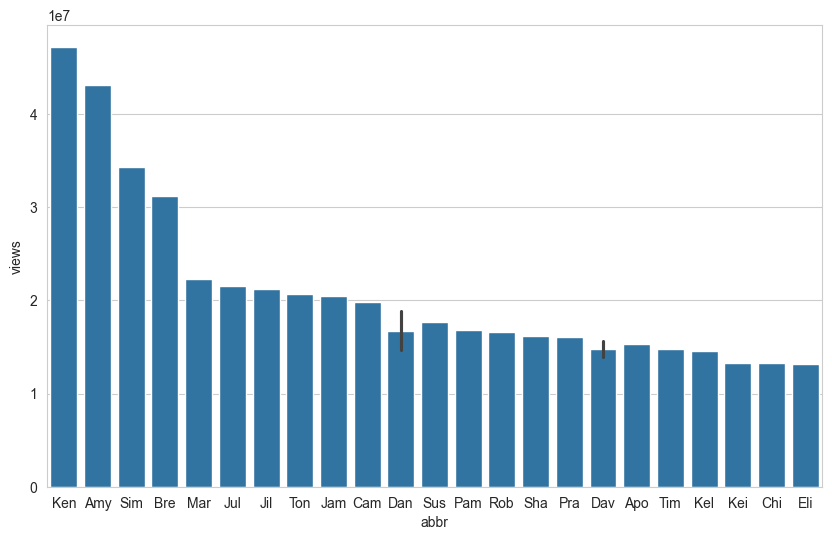

In [11]:
pop_talks['abbr'] = pop_talks['main_speaker'].apply(lambda x: x[:3]) # slice the first 3 characters of the speaker's name.
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

sns.barplot(x='abbr', y='views', data=pop_talks);

### Finally, in this section, let us investigate the **summary statistics** and the **distibution of the views** garnered on various TED Talks.

In [12]:
1e7

10000000.0

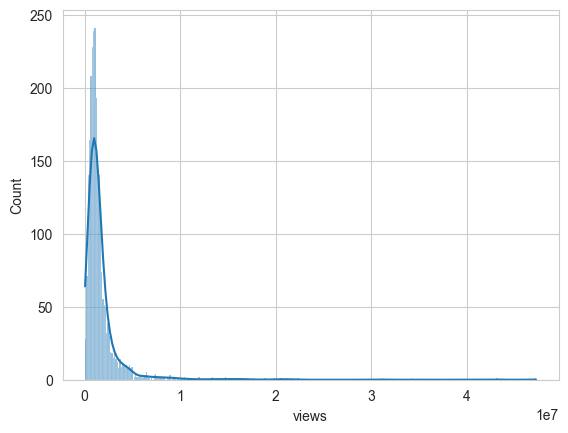

In [55]:
sns.histplot(df['views'],kde=True);

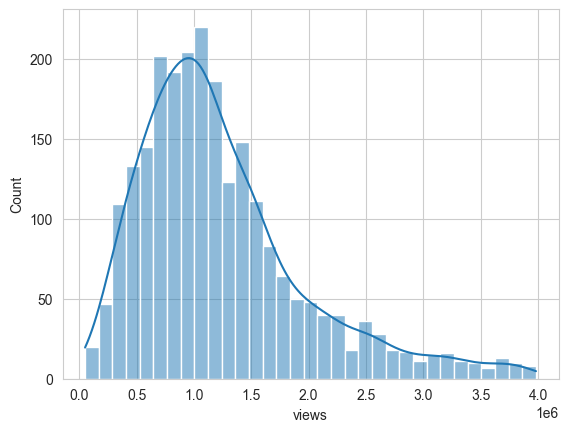

In [14]:
# Talks with number of views less than 4M
sns.histplot(df[df['views'] < 4e6]['views'],kde=True);

In [15]:
df['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

The average number of views on TED Talks in **1.6 million.** and the median number of views is **1.12 million**. This suggests a very high average level of popularity of TED Talks. We also notice that the majority of talks have views less than **4 million**. We will consider this as the cutoff point when costructing **box plots** in the later sections.

## Comments

Although the TED website gives us access to all the comments posted publicly, this dataset only gives us the number of comments. We will therefore have to restrict our analysis to this feature only. You could try performing textual analysis by scraping the website for comments.

In [16]:
df['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

### Observations

* On average, there are **191.5 comments** on every TED Talk. Assuming the comments are constructive criticism, we can conclude that the TED Online Community is highly involved in discussions revolving TED Talks.
* There is a **huge standard deviation** associated with the comments. In fact, it is even larger than the mean suggesting that the measures may be sensitive to outliers. We shall plot this to check the nature of the distribution.
* The minimum number of comments on a talk is **2** and the maximum is **6404**. The **range is 6402.**. The minimum number, though, may be as a result of the talk being posted extremely recently.

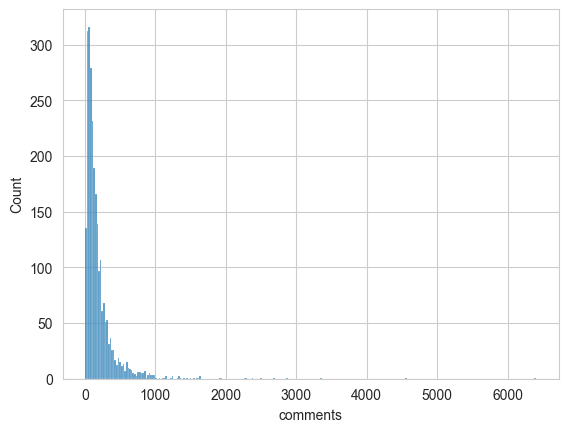

In [17]:
sns.histplot(df['comments']);

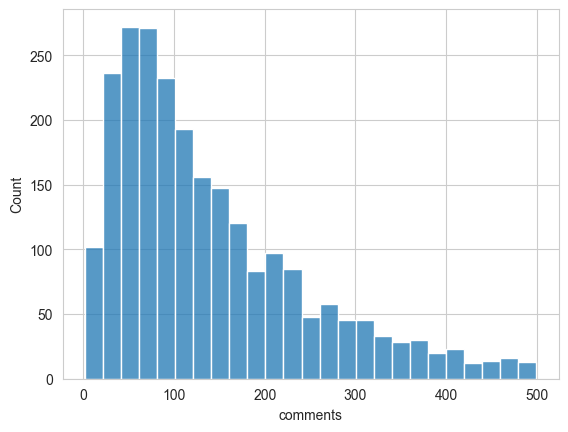

In [18]:
sns.histplot(df[df['comments'] < 500]['comments']);

From the plot above, we can see that the bulk of the talks have **fewer than 500 comments**. This clearly suggests that the mean obtained above has been heavily influenced by outliers. This is possible because the number of samples is **only 2550 talks**.

Another question that we am interested in is **if the number of views is correlated with the number of comments.** We should think that this is **the case as more popular videos tend to have more comments.** Let us find out.

# Correlation coofficient
A correlation coefficient is a number between -1 and 1 that tells you the strength and direction of a relationship between variables.

In other words, it reflects how similar the measurements of two or more variables are across a dataset.

[Correlation coofficient](https://www.scribbr.com/statistics/correlation-coefficient)

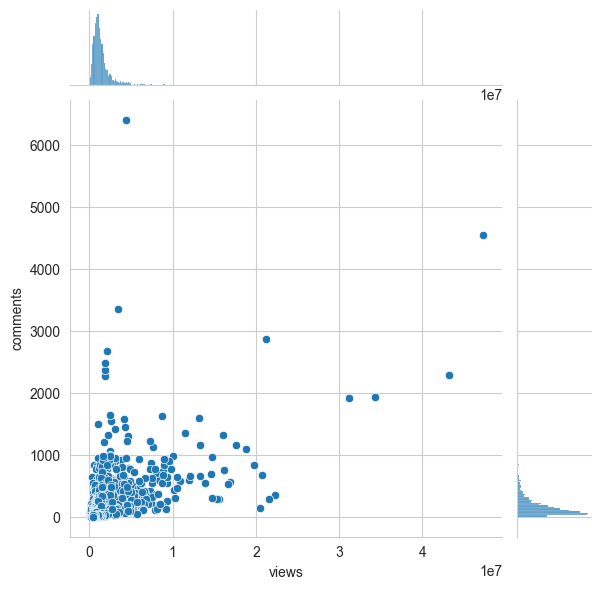

In [19]:
sns.jointplot(x='views', y='comments', data=df);

In [20]:
df[['views', 'comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


The correlation matrix show, the pearson coefficient is **slightly more than 0.5**. This suggests a **medium to strong correlation** between the two quantities. This result was pretty expected as mentioned above. Let us now check the number of views and comments on the 10 most commented TED Talks of all time.

In [21]:
df[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(10)

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


As can be seen above, Richard Dawkins' talk on **Militant Atheism'** generated the greatest amount of discussion and opinions despite having significantly lesser views than Ken Robinson's talk, which is second in the list. This raises some interesting questions.

Which talks tend to attract the largest amount of discussion?

To answer this question, we will define a new feature **discussion quotient** which is simply the ratio of the number of comments to the number of views. We will then check which talks have the largest discussion quotient.

In [22]:
df['dis_quo'] = df['comments']/df['views']

In [23]:
df[['title', 'main_speaker','views', 'comments', 'dis_quo', 'film_date']].sort_values('dis_quo', ascending=False).head(10)

,title,main_speaker,views,comments,dis_quo,film_date
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220,2009-12-02
803,E-voting without fraud,David Bismark,543551,834,0.001534,2010-07-14
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464,2002-02-02
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421,2010-02-10
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360,2011-03-03
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285,2010-10-10
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264,2010-12-08
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236,2014-03-18
661,The danger of science denial,Michael Specter,1838628,2272,0.001236,2010-02-11
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235,2009-11-04


## Analysing TED Talks by the month and the year

TED (especially TEDx) Talks tend to occur all throughout the year. Is there a hot month as far as TED is concerned? In other words, how are the talks distributed throughout the months since its inception? Let us find out.

In [24]:
df.loc[0,'film_date']

Timestamp('2006-02-25 00:00:00')

![](https://media.giphy.com/media/d1GpZTVp2eV7gQk8/giphy.gif)

In [25]:
df['f_month'] = df['film_date'].apply(lambda x: x.month)
df['p_month'] = df['published_date'].apply(lambda x: x.month)
month_df = pd.DataFrame(df['f_month'].value_counts()).reset_index()
month_df.columns = ['f_month', 'talks']
month_df

,f_month,talks
0,2,601
1,3,397
2,6,270
3,7,253
4,11,232
5,10,208
6,4,173
7,12,123
8,5,123
9,9,107


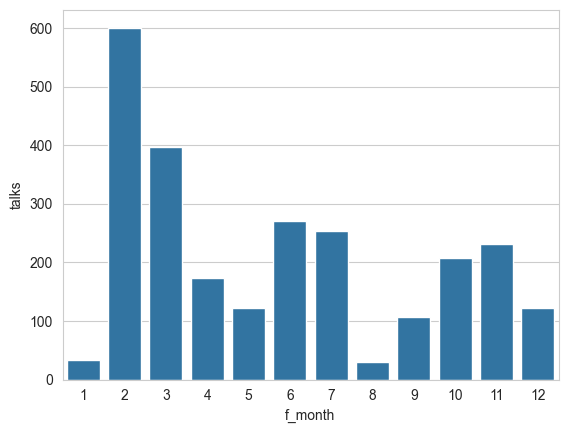

In [26]:
sns.barplot(x='f_month', y='talks', data=month_df);

**February** is clearly the most popular month for TED Conferences whereas **August** and **January** are the least popular. February's popularity is largely due to the fact that the official TED Conferences are held in February. Let us check the distribution for TEDx talks only.

In [27]:
df['event']

0            TED2006
1            TED2006
2            TED2006
3            TED2006
4            TED2006
            ...     
2545         TED2017
2546         TED2017
2547         TED2017
2548    TEDxMileHigh
2549         TED2017
Name: event, Length: 2550, dtype: object

In [28]:
df_x = df[df['event'].str.contains('TEDx')]
x_month_df = pd.DataFrame(df_x['f_month'].value_counts().reset_index())
x_month_df.columns = ['f_month', 'talks']

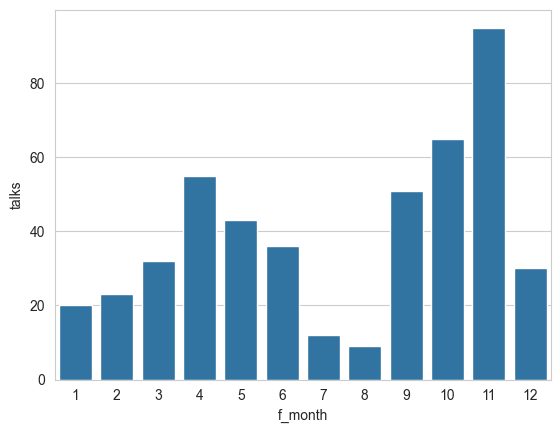

In [29]:
sns.barplot(x='f_month', y='talks', data=x_month_df);

**The most popular TEDx talks take place the most in October and November.**

Let us now visualize the number of TED talks through the years and check if our hunch that they have grown significantly is indeed true.

In [30]:
df['year'] = df['film_date'].apply(lambda x: x.year)
year_df = pd.DataFrame(df['year'].value_counts().reset_index())
year_df.columns = ['year', 'talks']

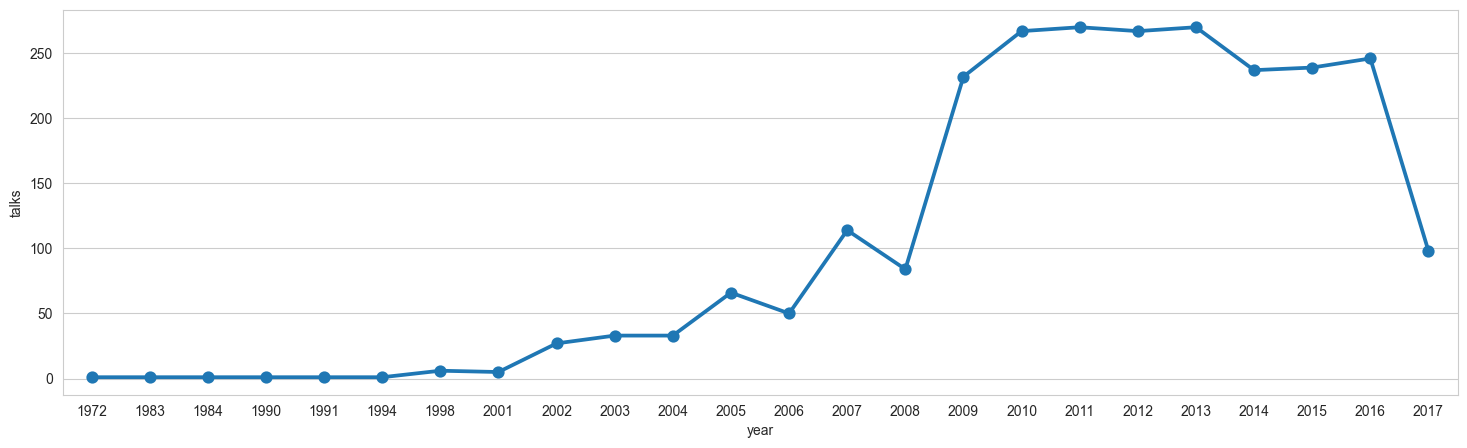

In [31]:
plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='talks', data=year_df);

### Obervations

* As expected, the number of TED Talks have gradually increased over the years since its inception in 1984. 
* There was a **sharp increase** in the number if talks in **2009**. It might be interesting to know the reasons behind 2009 being the tipping point where the number of talks increased more than twofold.
* The number of talks have been pretty much constant since 2009. 

## TED Speakers

In this section, we will try and gain insight about all the amazing speakers who have managed to inspire millions of people through their talks on the TED Platform. The first question we shall ask in this section is who are the most popular TED Speakers. That is, which speakers have given the most number of TED Talks.

In [32]:
df.groupby('main_speaker').count()

,name,title,description,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views,dis_quo,f_month,p_month,year
main_speaker,,,,,,,,,,,,,,,,,,,,
OK Go,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Rodrigo y Gabriela,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Silk Road Ensemble,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Sofi Tukker,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
AJ Jacobs,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ziauddin Yousafzai,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Ziyah Gafić,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Zubaida Bai,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


![](https://tedconfblog.files.wordpress.com/2011/05/tedsalonmay2011-speakers.jpg)

In [33]:
speaker_df = df.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
speaker_df.columns = ['main_speaker', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)
speaker_df.head(10)

,main_speaker,appearances
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


**Hans Rosling**, the Swiss Health Professor is clearly the most popular TED Speaker, with more than **9 appearances** on the TED Forum. **Juan Enriquez** comes a close second with **7 appearances**. Rives and Marco Tempest have graced the TED platform **6 times**.

Which occupation should you choose if you want to become a TED Speaker? Let us have a look what kind of people TED is most interested in inviting to its events.

In [34]:
occupation = df['speaker_occupation'].value_counts().reset_index()
occupation.columns = ['occupation', 'appearances']
occupation

,occupation,appearances
0,Writer,45
1,Artist,34
2,Designer,34
3,Journalist,33
4,Entrepreneur,31
...,...,...
1453,Science author,1
1454,Pro snowboarder,1
1455,"Artist, urban farmer",1
1456,"Entrepreneur, author",1


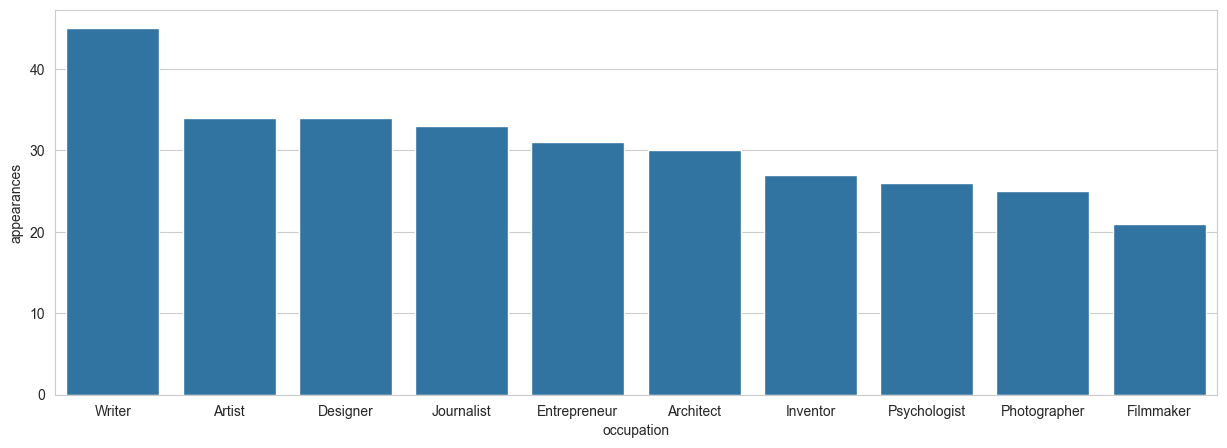

In [35]:
plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='appearances', data=occupation.head(10))
plt.show()

### Observations

* **Writers** are the most popular with more than 45 speakers identifying themselves as the aforementioned.
* **Artists** and **Designers** come a distant second with around 35 speakers in each category.
* This result must be taken with a pinch of salt as a considerable number of speakers identify themselves with multiple professions (for example, writer/entrepreneur). Performing an analysis taking this into consideraion is left as an exercise to the reader.

Do some professions tend to attract a larger number of viewers? Do answer this question let us visualise the relationship between the top 10 most popular professions and the views thet garnered in the form of a box plot.

C:\Users\yomna\AppData\Local\Temp\ipykernel_16368\780695329.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='speaker_occupation', y='views', data=df[df['speaker_occupation'].isin(occupation.head(10)['occupation'])], palette="muted", ax =ax)


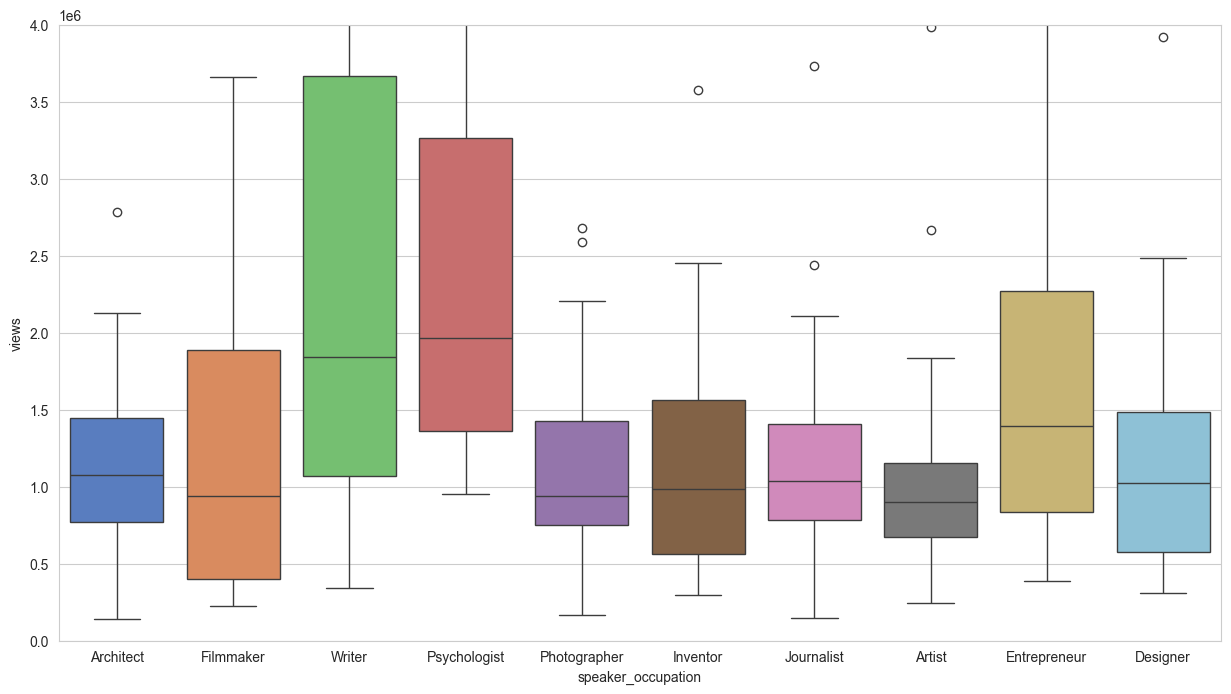

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='speaker_occupation', y='views', data=df[df['speaker_occupation'].isin(occupation.head(10)['occupation'])], palette="muted", ax =ax)
ax.set_ylim([0, 4e6])
plt.show()

On average, out of the top 10 most popular professions, **Psychologists** tend to garner the most views. **Writers** have the greatest range of views between the first and the third quartile.. 

Finally, let us check the number of talks which have had more than one speaker.

## TED Events

Which TED Events tend to hold the most number of TED.com upload worthy events? We will try to answer that question in this section.

In [37]:
events_df = df[['title', 'event']].groupby('event').count().reset_index()
events_df.columns = ['event', 'talks']
events_df = events_df.sort_values('talks', ascending=False)
events_df.head(10)

,event,talks
64,TED2014,84
59,TED2009,83
63,TED2013,77
66,TED2016,77
65,TED2015,75
99,TEDGlobal 2012,70
61,TED2011,70
60,TED2010,68
98,TEDGlobal 2011,68
57,TED2007,68


As expected, the official TED events held the major share of TED Talks published on the TED.com platform. **TED2014 had the most number of talks** followed by TED2009. There isn't too much insight to be gained from this. 

## TED Languages

One remarkable aspect of TED Talks is the sheer number of languages in which it is accessible. Let us perform some very basic data visualisation and descriptive statistics about languages at TED.

In [38]:
df['languages'].describe()

count    2550.000000
mean       27.326275
std         9.563452
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

On average, a TED Talk is available in 27 different languages. The maximum number of languages a TED Talk is available in is a staggering 72. Let us check which talk this is.

In [39]:
df[df['languages'] == 72]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,tags,languages,ratings,related_talks,url,views,dis_quo,f_month,p_month,year
973,Matt Cutts: Try something new for 30 days,Try something new for 30 days,"Is there something you've always meant to do, ...",Matt Cutts,Technologist,1,207,TED2011,2011-03-03,2011-07-01 15:14:00,...,"['culture', 'success']",72,"[{'id': 10, 'name': 'Inspiring', 'count': 6171...","[{'id': 947, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/matt_cutts_try_somet...,8838874,0.000083,3,7,2011


The most translated TED Talk of all time is Matt Cutts' **Try Something New in 30 Days**. The talk does have a very universal theme of exploration. The sheer number of languages it's available in demands a little more inspection though as it has just over 8 million views, far fewer than the most popular TED Talks. 

Finally, let us check if there is a correlation between the number of views and the number of languages a talk is availbale in. We would think that this should be the case since the talk is more accessible to a larger number of people but as Matt Cutts' talk shows, it may not really be the case.

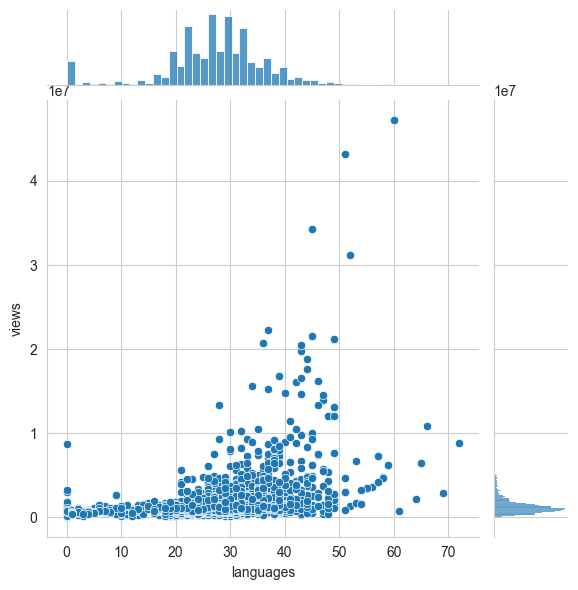

In [40]:
sns.jointplot(x='languages', y='views', data=df)
plt.show()

The Pearson coefficient is 0.38 suggesting a **medium correlation** between the aforementioned quantities. 

# Tags

In [41]:
# print a sample of tags column
df

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,tags,languages,ratings,related_talks,url,views,dis_quo,f_month,p_month,year
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,2006-02-25,2006-06-27 00:11:00,...,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,2,6,2006
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,2006-02-25,2006-06-27 00:11:00,...,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,2,6,2006
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,2006-02-24,2006-06-27 00:11:00,...,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,2,6,2006
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,2006-02-26,2006-06-27 00:11:00,...,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550,0.000118,2,6,2006
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,2006-02-22,2006-06-27 20:38:00,...,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.000049,2,6,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,Duarte Geraldino: What we're missing in the de...,What we're missing in the debate about immigra...,"Between 2008 and 2016, the United States depor...",Duarte Geraldino,Journalist,1,476,TED2017,2017-06-06,2017-09-19 20:00:16,...,"['TED Residency', 'United States', 'community'...",4,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/duarte_geraldino_wha...,450430,0.000038,6,9,2017
2546,Armando Azua-Bustos: The most Martian place on...,The most Martian place on Earth,How can you study Mars without a spaceship? He...,Armando Azua-Bustos,Astrobiologist,1,290,TED2017,2017-04-24,2017-09-20 15:02:17,...,"['Mars', 'South America', 'TED Fellows', 'astr...",3,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/armando_azua_bustos_...,417470,0.000014,4,9,2017
2547,Radhika Nagpal: What intelligent machines can ...,What intelligent machines can learn from a sch...,Science fiction visions of the future show us ...,Radhika Nagpal,Robotics engineer,1,651,TED2017,2017-04-24,2017-09-21 15:01:35,...,"['AI', 'ants', 'fish', 'future', 'innovation',...",1,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/radhika_nagpal_what_...,375647,0.000027,4,9,2017
2548,Theo E.J. Wilson: A black man goes undercover ...,A black man goes undercover in the alt-right,In an unmissable talk about race and politic

In [42]:
## create a list of tags
import ast
df['tags'] = df['tags'].apply(ast.literal_eval)
df['tags']

0       [children, creativity, culture, dance, educati...
1       [alternative energy, cars, climate change, cul...
2       [computers, entertainment, interface design, m...
3       [MacArthur grant, activism, business, cities, ...
4       [Africa, Asia, Google, demo, economics, global...
                              ...                        
2545    [TED Residency, United States, community, fami...
2546    [Mars, South America, TED Fellows, astrobiolog...
2547    [AI, ants, fish, future, innovation, insects, ...
2548    [Internet, TEDx, United States, community, com...
2549    [cities, design, future, infrastructure, play,...
Name: tags, Length: 2550, dtype: object

In [43]:
# Create a series of tags and print value counts
tags = pd.Series([categ for row in df['tags'] for categ in row])
tags
tags_counts = tags.value_counts()
tags_counts

technology       727
science          567
global issues    501
culture          486
TEDx             450
                ... 
origami            2
cloud              1
testing            1
skateboarding      1
funny              1
Name: count, Length: 416, dtype: int64

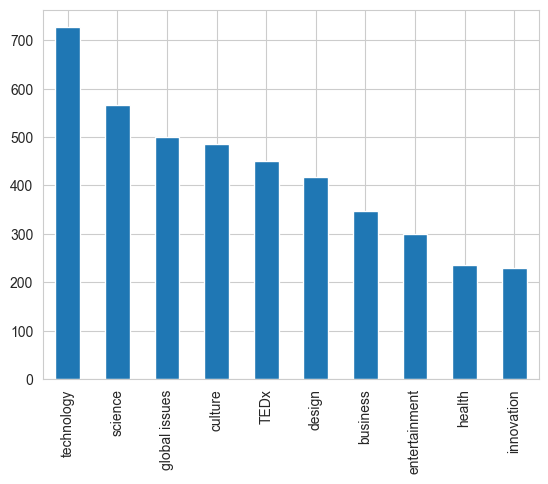

In [44]:
## plot the heighest ten tags in ted talks
tags_counts[:10].plot.bar();

As may have been expected, **Technology** is the most popular topic for talks. **Science** and **Global Issues** are the second and the third most popular themes respectively.

## Talk Duration and Word Counts

In this section, we will perform analysis on the length of TED Talks. TED is famous for imposing a very strict time limit of 18 minutes. Although this is the suggested limit, there have been talks as short as 2 minutes and some have stretched to as long as 24 minutes. Let us get an idea of the distribution of TED Talk durations.

In [45]:
#Convert to minutes
df['duration'] = df['duration']/60
df['duration'].describe()

count    2550.000000
mean       13.775170
std         6.233486
min         2.250000
25%         9.616667
50%        14.133333
75%        17.445833
max        87.600000
Name: duration, dtype: float64

TED Talks, on average are **13.7 minutes long**. I find this statistic surprising because TED Talks are often synonymous with 18 minutes and the average is a good 3 minutes shorter than that.

The shortest TED Talk on record is **2.25 minutes** long whereas the longest talk is **87.6 minutes** long. I'm pretty sure the longest talk was not actually a TED Talk. Let us look at both the shortest and the longest talk.

In [46]:
df[df['duration'] == 2.25]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,tags,languages,ratings,related_talks,url,views,dis_quo,f_month,p_month,year
239,Murray Gell-Mann: The ancestor of language,The ancestor of language,After speaking at TED2007 on elegance in physi...,Murray Gell-Mann,Physicist,1,2.25,TED2007,2007-03-03,2008-06-11 01:00:00,...,"[culture, global issues, history, language, ph...",61,"[{'id': 22, 'name': 'Fascinating', 'count': 78...","[{'id': 161, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/murray_gell_mann_on_...,785293,0.000097,3,6,2007


In [47]:
df[df['duration'] == 87.6]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,tags,languages,ratings,related_talks,url,views,dis_quo,f_month,p_month,year
640,"Douglas Adams: Parrots, the universe and every...","Parrots, the universe and everything","Blind river dolphins, reclusive lemurs, a parr...",Douglas Adams,"Author, satirist",1,87.6,University of California,2001-05-16,2010-03-16 17:54:00,...,"[biodiversity, biology, comedy, humor, life, r...",0,"[{'id': 22, 'name': 'Fascinating', 'count': 29...","[{'id': 635, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/douglas_adams_parrot...,473220,0.000213,5,3,2001


The shortest talk was at TED2007 titled **The ancestor of language** by Murray Gell-Mann. The longest talk on TED.com is a talk titled **Parrots, the universe and everything** delivered by Douglas Adams at the University of California in 2001.

# Ratings
1. Create a 'funny' column from 'ratings' column contains the count of funny rating
2. Plot the correlation between funny rating and the number of views

In [48]:
sample = df.iloc[4]['ratings']
sample

"[{'id': 9, 'name': 'Ingenious', 'count': 3202}, {'id': 7, 'name': 'Funny', 'count': 1390}, {'id': 1, 'name': 'Beautiful', 'count': 942}, {'id': 3, 'name': 'Courageous', 'count': 318}, {'id': 11, 'name': 'Longwinded', 'count': 110}, {'id': 2, 'name': 'Confusing', 'count': 72}, {'id': 21, 'name': 'Unconvincing', 'count': 67}, {'id': 8, 'name': 'Informative', 'count': 5433}, {'id': 10, 'name': 'Inspiring', 'count': 2893}, {'id': 22, 'name': 'Fascinating', 'count': 4606}, {'id': 23, 'name': 'Jaw-dropping', 'count': 3736}, {'id': 24, 'name': 'Persuasive', 'count': 2542}, {'id': 25, 'name': 'OK', 'count': 248}, {'id': 26, 'name': 'Obnoxious', 'count': 61}]"

In [49]:
type(sample)

str

In [50]:
import ast
sample = ast.literal_eval(sample) #convert rating to list of categories
sample

[{'id': 9, 'name': 'Ingenious', 'count': 3202},
 {'id': 7, 'name': 'Funny', 'count': 1390},
 {'id': 1, 'name': 'Beautiful', 'count': 942},
 {'id': 3, 'name': 'Courageous', 'count': 318},
 {'id': 11, 'name': 'Longwinded', 'count': 110},
 {'id': 2, 'name': 'Confusing', 'count': 72},
 {'id': 21, 'name': 'Unconvincing', 'count': 67},
 {'id': 8, 'name': 'Informative', 'count': 5433},
 {'id': 10, 'name': 'Inspiring', 'count': 2893},
 {'id': 22, 'name': 'Fascinating', 'count': 4606},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 3736},
 {'id': 24, 'name': 'Persuasive', 'count': 2542},
 {'id': 25, 'name': 'OK', 'count': 248},
 {'id': 26, 'name': 'Obnoxious', 'count': 61}]

In [51]:
type(first)

NameError: name 'first' is not defined

In [ ]:
first[3]#['count'] #get funny counts

## 1. Create a new funny column contains the count of funny ratings

In [ ]:
# 1.1 apply ast.literal_eval to convert ratings to list of categories
df['ratings'] = df['ratings'].apply(ast.literal_eval)
df

In [ ]:
df.loc[44]["ratings"]

In [ ]:
def count_rate(ratings, rate_category):
    for r in ratings:
#         print(r)
        if rate_category in r.get('name'):
            return r['count']
        else: continue
    return 0
count_rate(df.loc[44]["ratings"], 'Confusing')

In [ ]:
# 1.2 Create a new funny column contains the count of funny ratings
df['funny'] = df['ratings'].apply(lambda x:count_rate(x, 'Funny'))
df

In [ ]:
# Sort dataframe based on funny rating count
df.sort_values('funny', ascending = False).head(5)

# ----------------------------------------------------------------------------------------------------------
# Lab Tasks

### (1) Find the most Beautiful Talks of all time

In [ ]:
df['Beautiful'] = df['ratings'].apply(lambda x : count_rate(x,'Beautiful'))
df.sort_values('Beautiful', ascending = False).head(5)

### (2) Find the most Confusing Talks of all time

In [ ]:
df['Confusing'] = df['ratings'].apply(lambda x : count_rate(x,'Confusing'))
df.sort_values('Confusing', ascending = False).head(1)

###  (3) Calculate the correlation between the views  and comments column
<img src="https://i.ytimg.com/vi/qwqgoHv9tY0/maxresdefault.jpg" width='500'/>

In [ ]:
x_mean = df['views'].mean()
y_mean = df['comments'].mean()
n = len(df)-1
s = sum([(x - x_mean) *(y - y_mean) for x, y in zip(df['views'], df['comments'])])
cov = sum([(x - x_mean) *(y - y_mean) for x, y in zip(df['views'], df['comments'])]) / n
corr = cov/(df['views'].std() *df['comments'].std())
print(corr)

In [ ]:
df[['views', 'comments']].corr()